# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
tfms = get_transforms(flip_vert=True)
data = ImageDataBunch.from_folder('flower_data/', ds_tfms=tfms, size=224, bs=64).normalize(imagenet_stats)

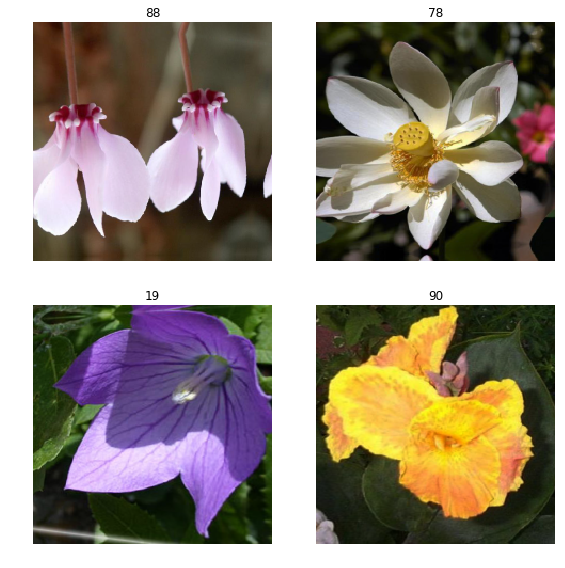

In [3]:
data.show_batch(2)

torch.Size([224, 224])

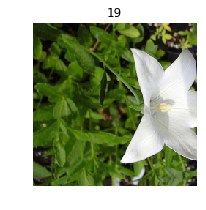

In [4]:
train_ds = data.train_ds
img, label = train_ds[0]
img.show(title=label)
img.size

torch.Size([224, 224])

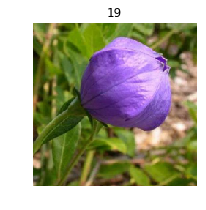

In [5]:
val_ds = data.valid_ds
img, label = val_ds[0]
img.show(title=label)
img.size

In [6]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.model = torch.nn.DataParallel(learn.model, [0, 1])

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


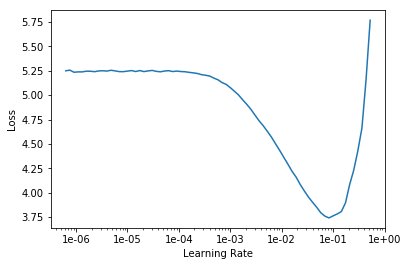

In [8]:
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy
1,1.399748,0.500409,0.866748
2,1.078829,0.823444,0.777506
3,0.658443,0.342498,0.902200
4,0.335140,0.173422,0.949878
5,0.189725,0.146249,0.958435


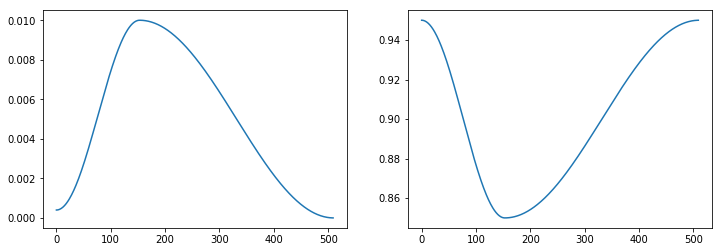

In [10]:
learn.recorder.plot_lr(show_moms=True)

In [11]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-6, 1e-4, 1e-2), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy
1,0.137840,0.149465,0.957213
2,0.132425,0.136323,0.964548
3,0.104068,0.129514,0.965770
4,0.103835,0.123459,0.966993
5,0.095813,0.125936,0.965770
6,0.097115,0.122435,0.966993


In [12]:
accuracy(*learn.TTA())


tensor(0.9719)

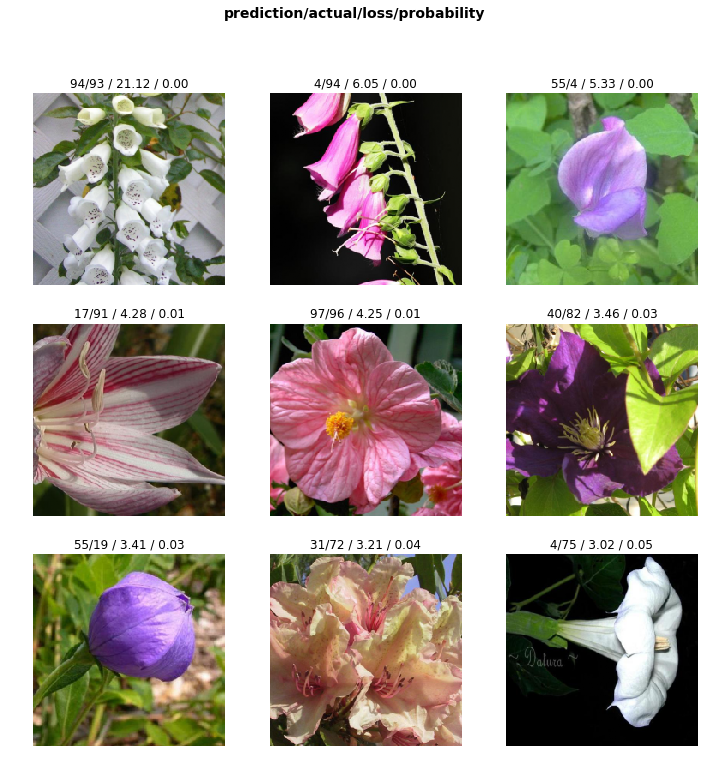

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)

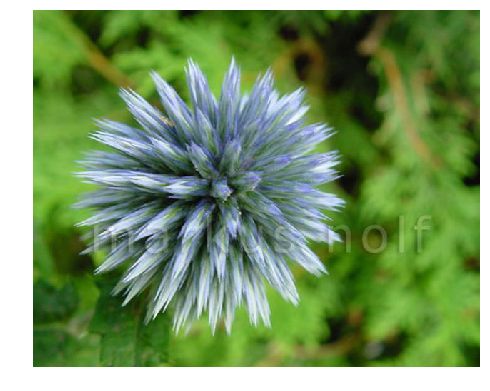

In [14]:
img = open_image('flower_data/valid/10/image_07102.jpg')
img.show(figsize=(8,8))

In [15]:
cls, label, probs = learn.predict(img)
cls, label, probs

(Category 10,
 tensor(1),
 tensor([3.8204e-10, 9.9997e-01, 7.4736e-09, 4.3659e-11, 5.5777e-11, 1.9524e-09,
         1.3113e-06, 1.4586e-09, 9.2276e-07, 2.0741e-11, 7.6560e-09, 2.4530e-08,
         1.4152e-10, 2.7360e-10, 6.2249e-12, 3.3502e-11, 4.7384e-11, 5.0936e-08,
         8.8959e-09, 3.4937e-09, 1.9124e-05, 3.2529e-08, 1.1077e-10, 4.4027e-09,
         7.9659e-08, 1.6452e-10, 5.3259e-09, 2.2361e-08, 9.4118e-09, 7.4470e-07,
         6.6569e-12, 1.7653e-07, 1.0593e-13, 4.3108e-11, 7.1774e-06, 1.0311e-10,
         6.0994e-11, 6.1360e-10, 3.8017e-09, 6.9063e-10, 1.3125e-10, 2.5809e-13,
         7.0148e-10, 2.4385e-09, 6.9383e-10, 3.1594e-08, 2.4141e-09, 7.1533e-09,
         8.5785e-08, 5.0406e-09, 1.3081e-08, 1.0287e-09, 3.2143e-10, 2.3553e-11,
         3.5298e-09, 1.1929e-08, 9.2483e-10, 9.4810e-12, 8.4885e-11, 1.7649e-11,
         5.5612e-11, 2.6602e-11, 2.4462e-09, 3.0812e-10, 8.8456e-09, 2.7460e-08,
         2.1225e-09, 9.1259e-11, 1.2477e-10, 2.4222e-12, 1.2477e-11, 1.7665e-08,
  